Census Income

Project Description:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
# check for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
# check for duplicate rows
df.duplicated().sum()

24

There are 24 duplicate rows present in the dataset.

In [7]:
df[df.duplicated()]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [8]:
#dropping duplicate rows
df= df.drop_duplicates()
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
# reset index
df.reset_index(drop=True)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32532,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32533,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32534,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
# checking info and if anything unusual present.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Everything looking good.

In [11]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observing mean, std, quartiles and max values there are outliers in the dataset.

Also the difference between 75% and max values of Capital_gain and Capital_loss is huge. Also the deviation is very large.

In [12]:
df.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

In [13]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [14]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

#### separating categorical and continuous variables

In [15]:
# continuous variables
con=df.select_dtypes(include= 'number').columns
con

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [16]:
# categorical columns
cat=df.select_dtypes(exclude= 'number').columns
cat

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

#### More on understanding columns

In [17]:
for i in cat:
    print(i)
    print(df[i].value_counts())
    print()

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

Occupation
 Prof-specialty      

Few columns are with " ?" as values.

In [18]:
for i in cat:
    if " ?" in df[i].unique():
        print(i)

Workclass
Occupation
Native_country


Workclass, Occupation and Native_country got unknown value indicating " ?". 

This one though is unknown but occur more times than many of categories in respective column. As this unknown values are more in numbers, we should not replace them. 

Encoding will take care of this.

These 

In [19]:
# 'Capital_gain' and 'Capital_loss'
for i in ['Capital_gain', 'Capital_loss']:
    print("Column:",i)
    print(df[i].value_counts())
    print()

Column: Capital_gain
0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

Column: Capital_loss
0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64



Both of the columns got '0' as value in most of the column.

#### Distribution plot and skewness of continous columns

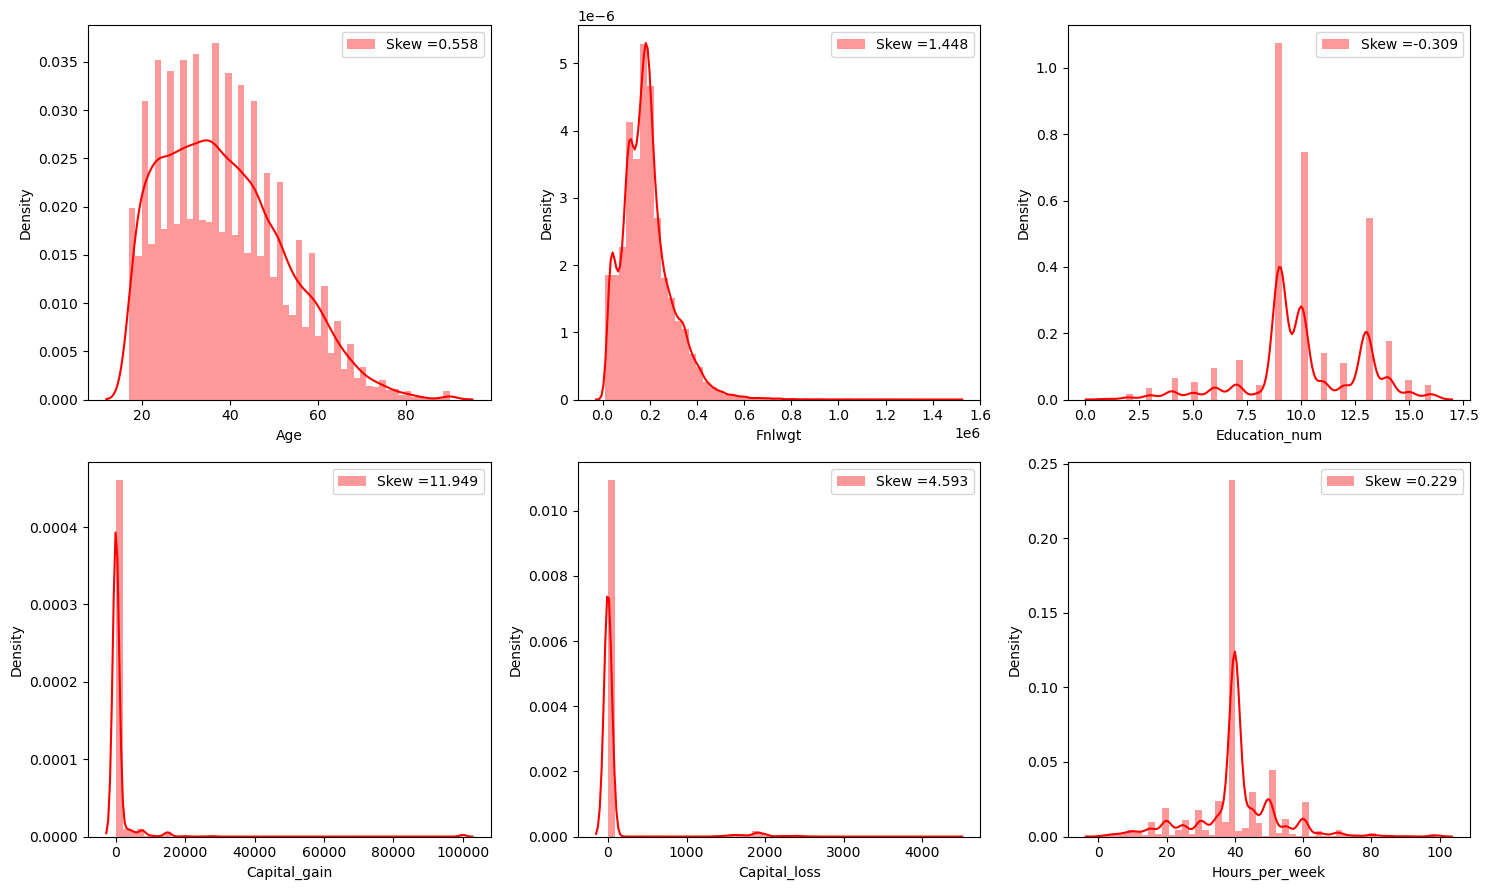

In [20]:
# Distribution plot and skewness
plt.figure(figsize=(15,9))
c=1
for i in con:
    plt.subplot(2,3,c)
    skew= df[i].skew()
    sns.distplot(df[i], color='red', label= 'Skew =%.3f' %skew)
    plt.legend(loc='upper right')
    c+=1
    
plt.tight_layout()

In [21]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

Target is imbalanced where income '<=50K' is majority.

#### Visualization

[Text(0, 0, '24697'), Text(0, 0, '7839')]

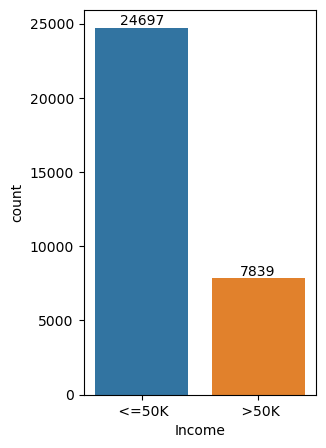

In [22]:
# target variable
plt.figure(figsize=(3,5))
ax= sns.countplot(x=df['Income'], data=df)
plt.bar_label(ax.containers[0])

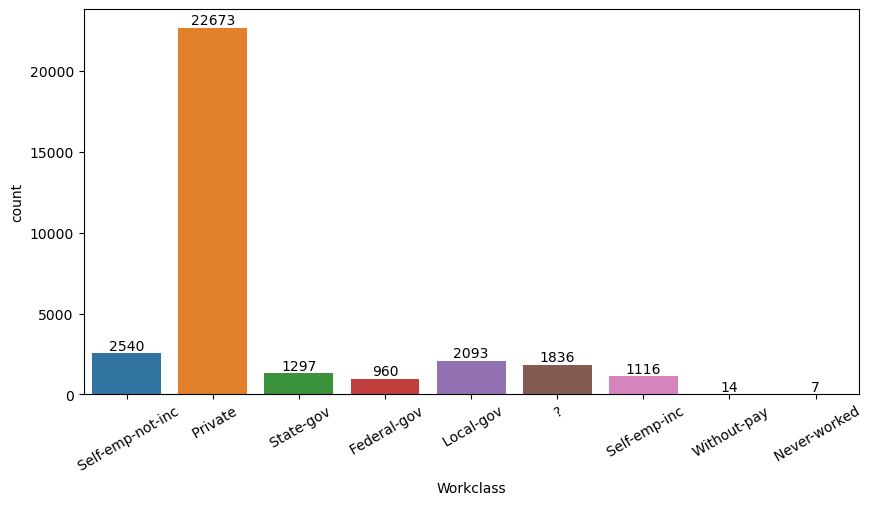

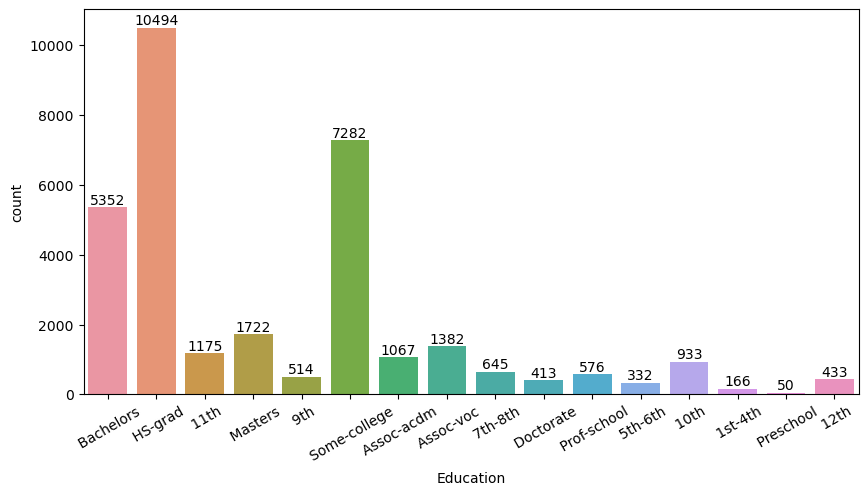

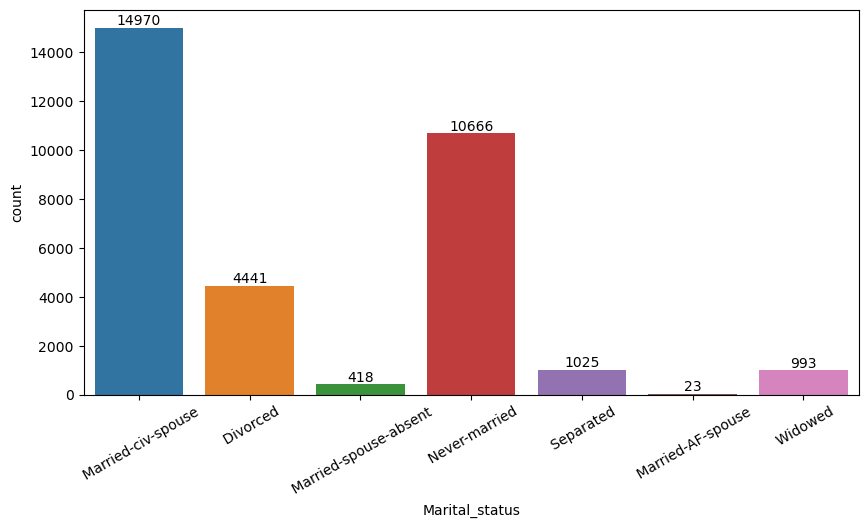

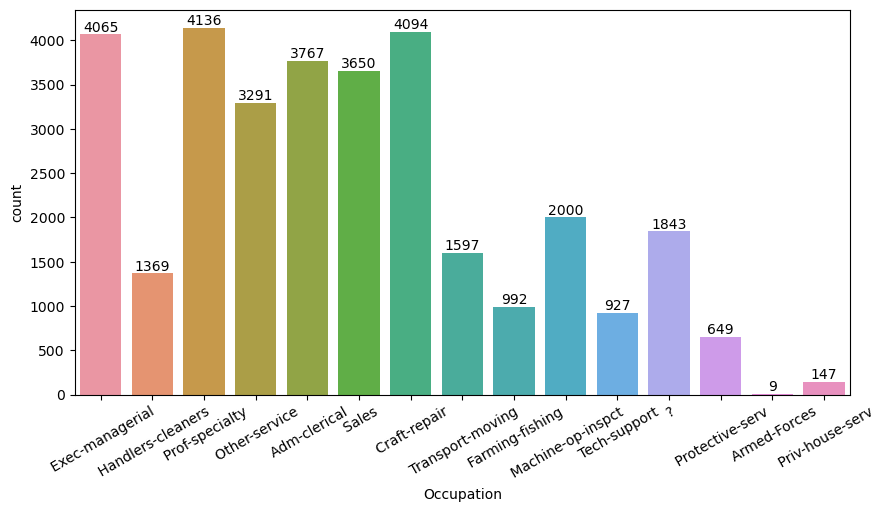

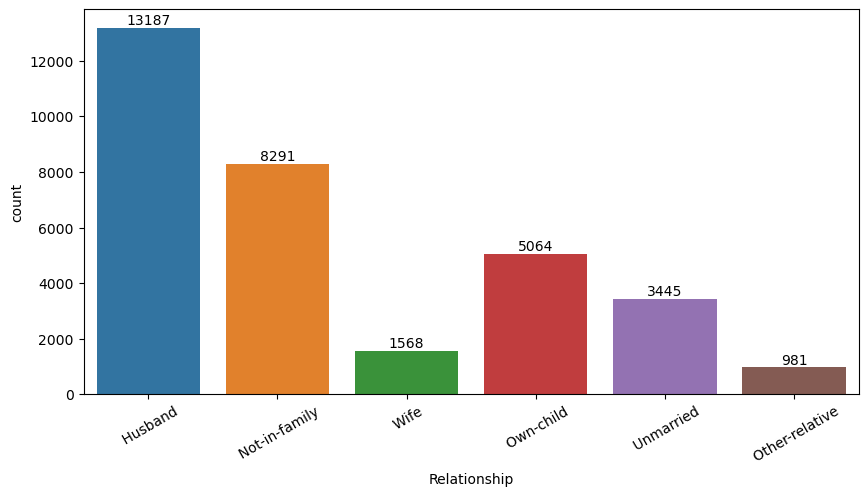

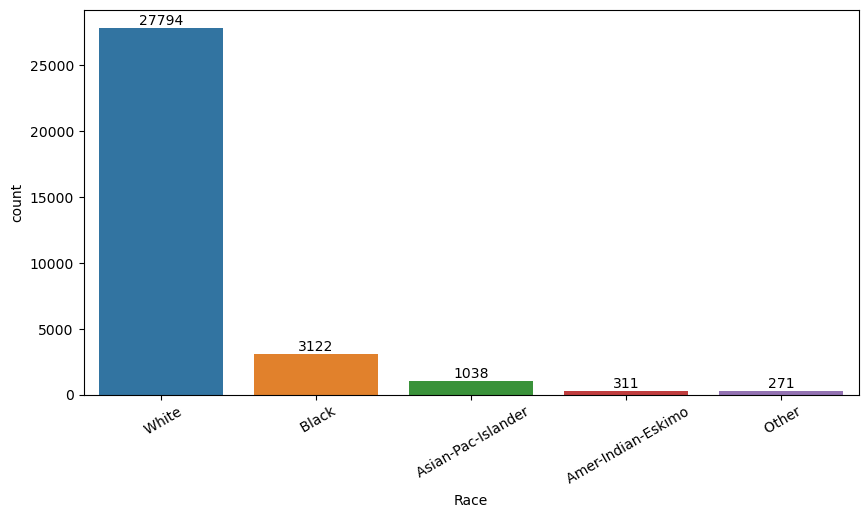

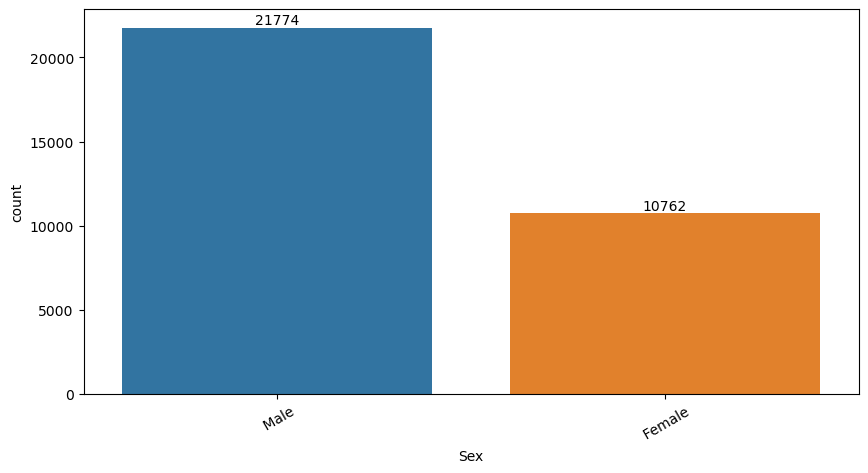

In [23]:
# categorical columns
for i in df[cat[:-2]]:
    plt.figure(figsize=(10,5))
    ax= sns.countplot(x=i, data=df)
    plt.bar_label(ax.containers[0])
    plt.xticks(rotation=30)

Workclass-
Huge numbers are from Private jobs while there are few people working without pay and few who never worked.


Education-
maximum are from HS-grade while minimum are who did just their preschool.


Maritial_status-
Married-civ-spouse are at top followed by people who Never_married.


Sex-
Males are more than twice in number than females.


Relationship-
As males are more, Husband are majority in relationship followed by Not-in-family.


Race-
White are in huge majority than anyother race.

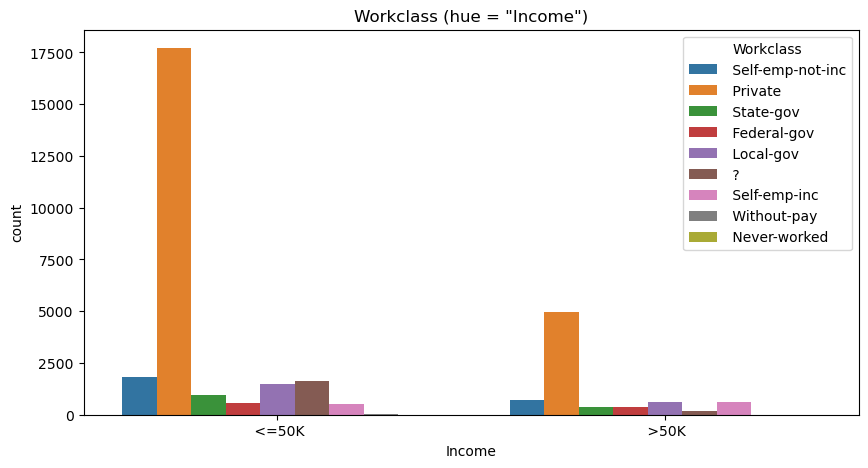

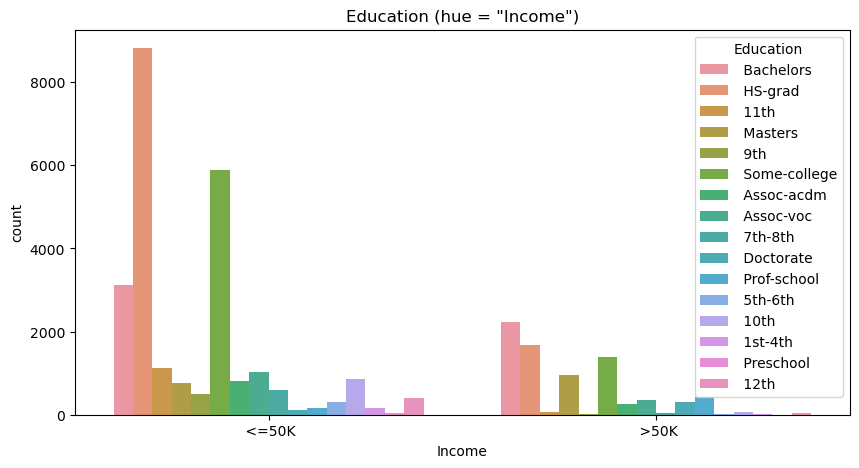

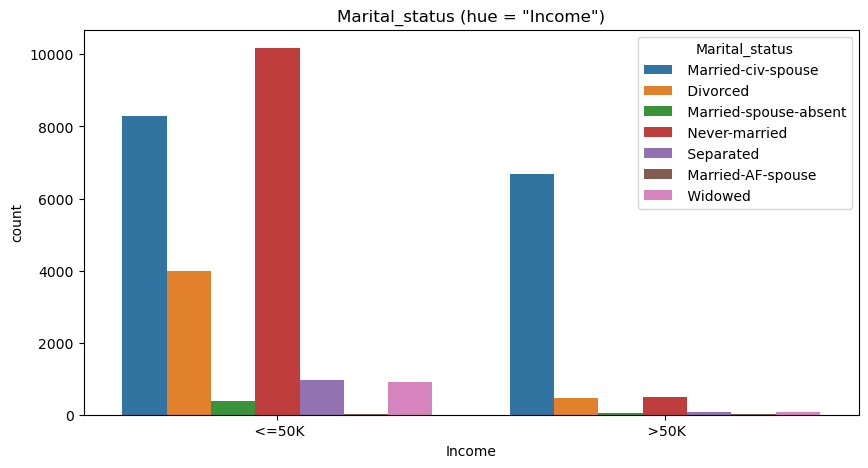

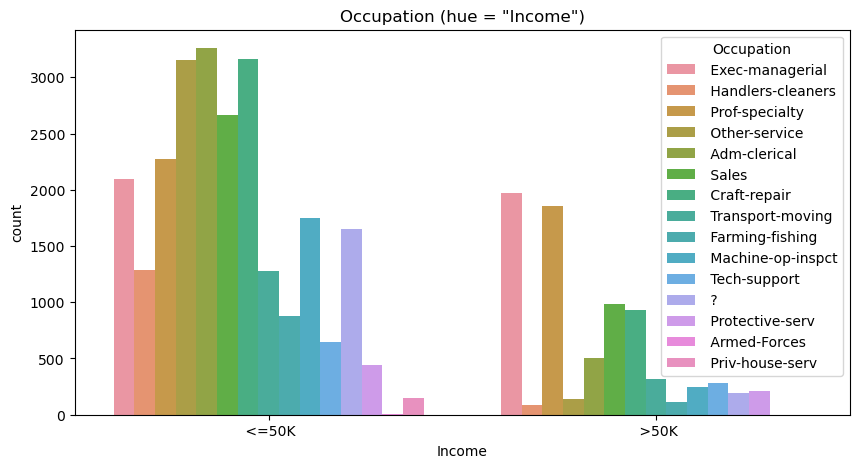

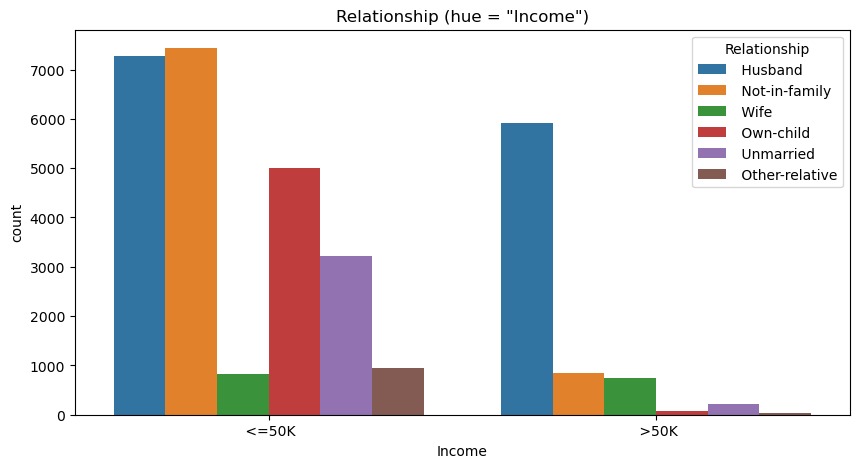

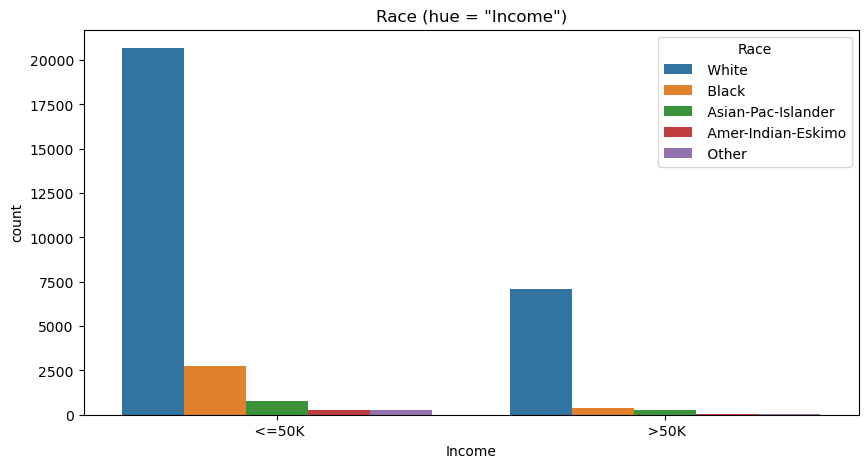

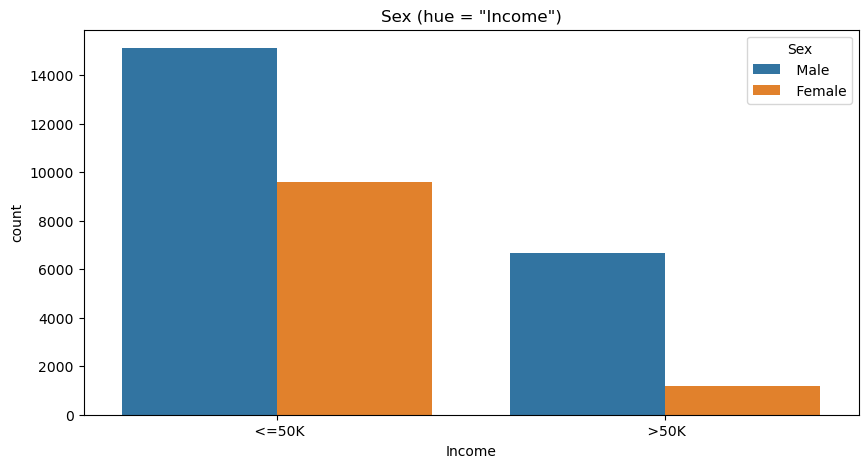

In [24]:
for i in df[cat[:-2]]:
    plt.figure(figsize=(10,5))
    sns.countplot(x='Income',hue=i,data=df)
    plt.title(i+' (hue = "Income")' )

Workclass-
Maximum are from private workclass in both the income category.


Education-
maximum are from HS-grade with income <=50k while people with bachelors are in majority with income >50k.


Maritial_status-
Income <=50k got more number of people who never-married, followed by maried-civ-spouse. where as numbers of people in category of income >50k is solely dominated by maried-civ-spouse.


Sex-
Males are more than females in both the categories. Females with im=ncome >50k is very less.


Relationship-
Not-in-family and Husband are top two in category of income <=50k. where as in category of income >50k Husband are much more in numbers.


Race-
White are in huge majority than anyother race in any category.

In [25]:
con

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

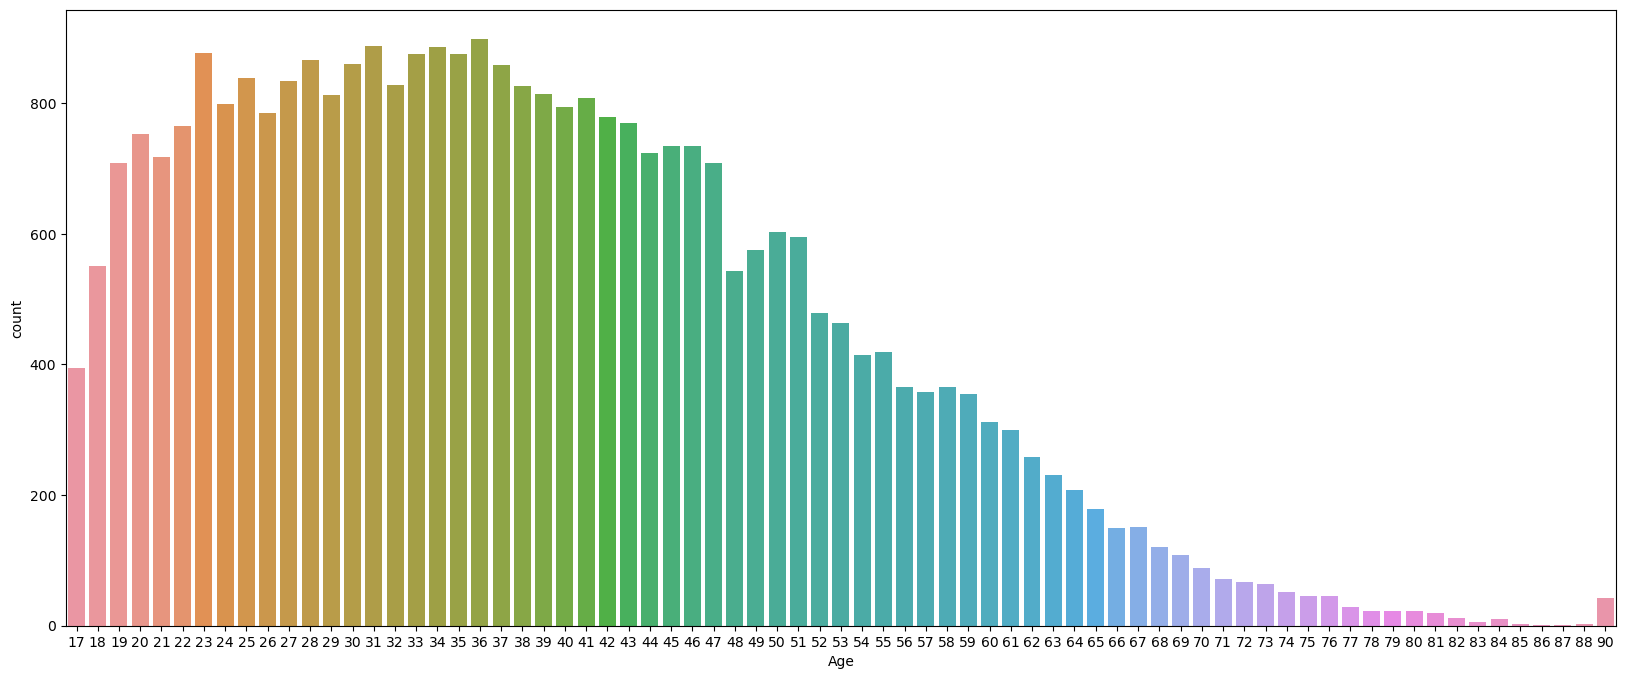

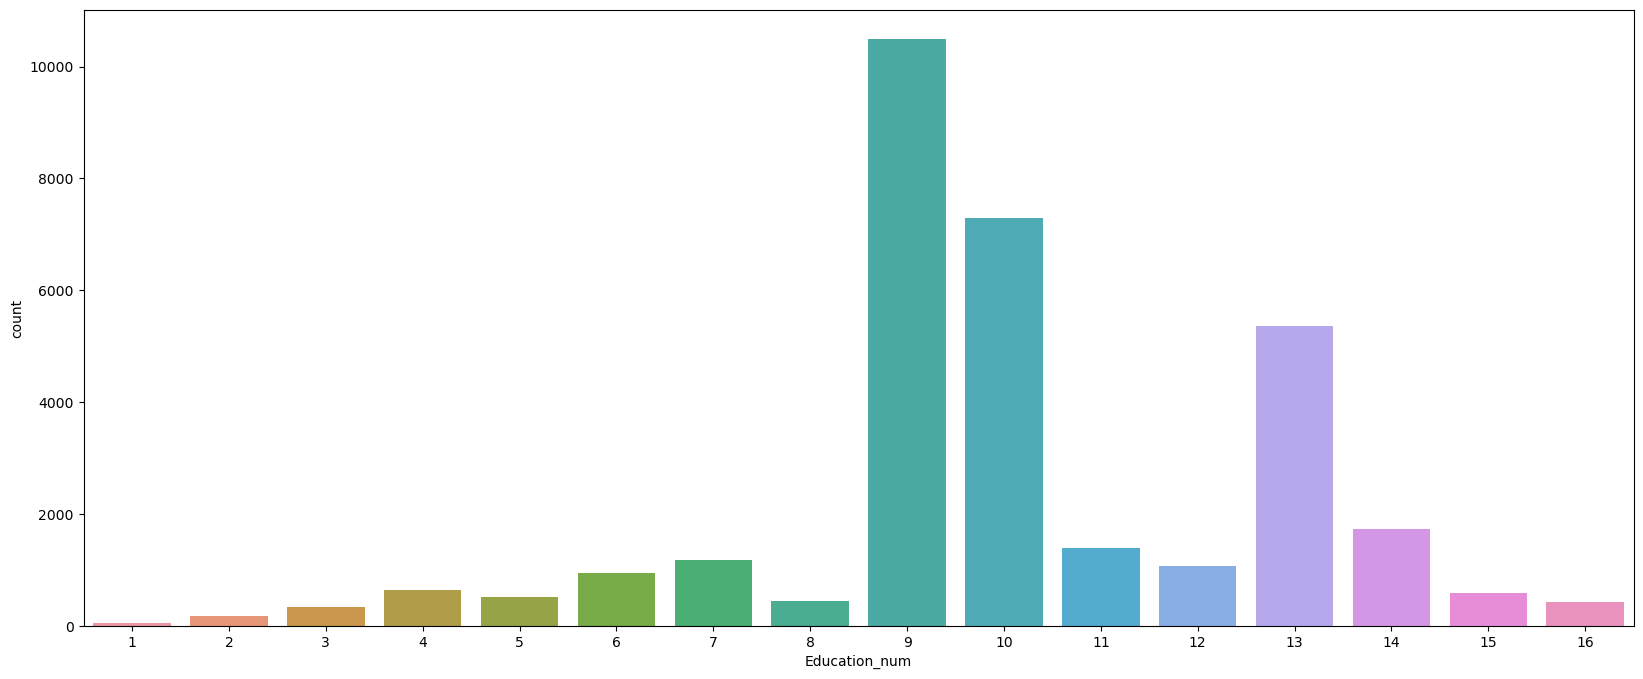

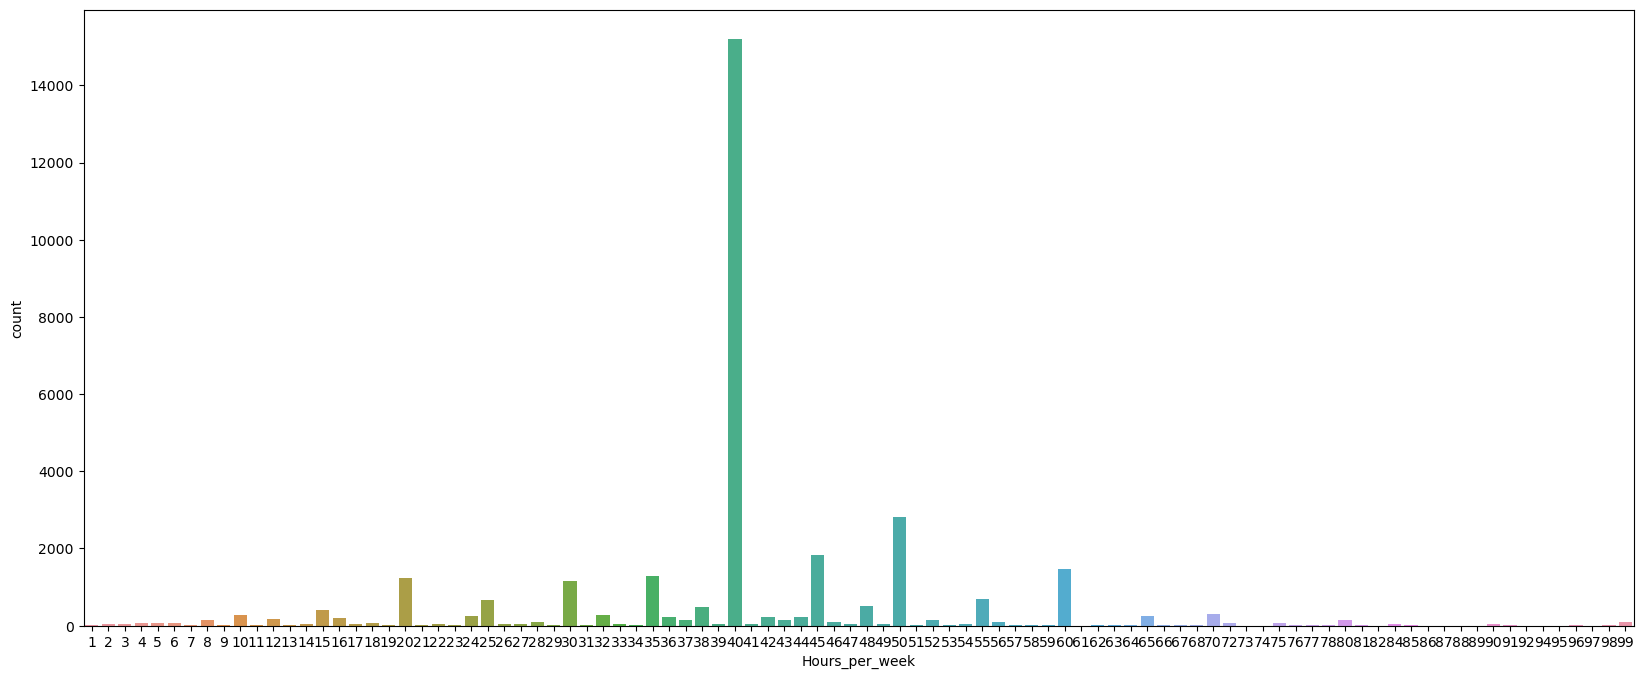

In [26]:
for i in ['Age', 'Education_num', 'Hours_per_week']:
    plt.figure(figsize=(20,8))
    sns.countplot(x=df[i])

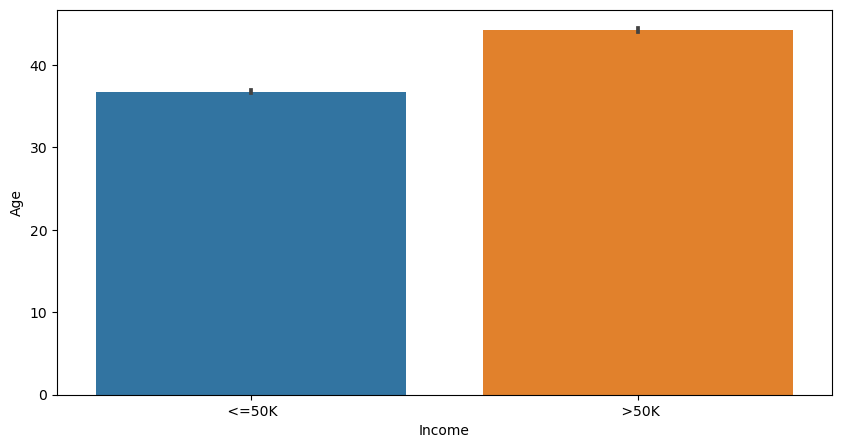

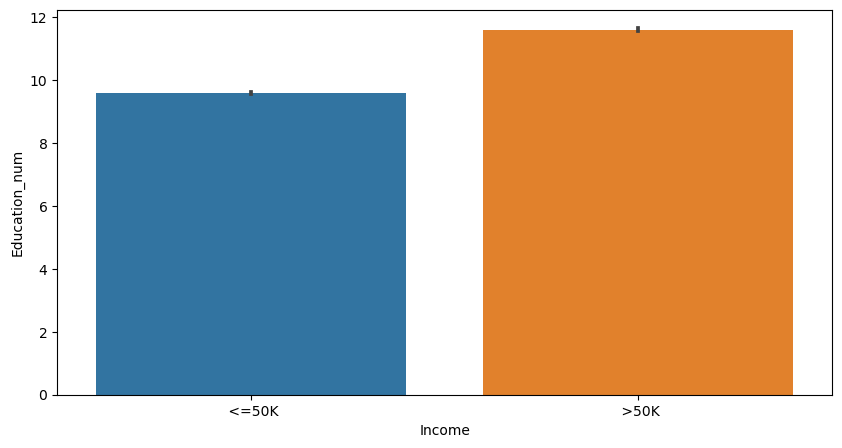

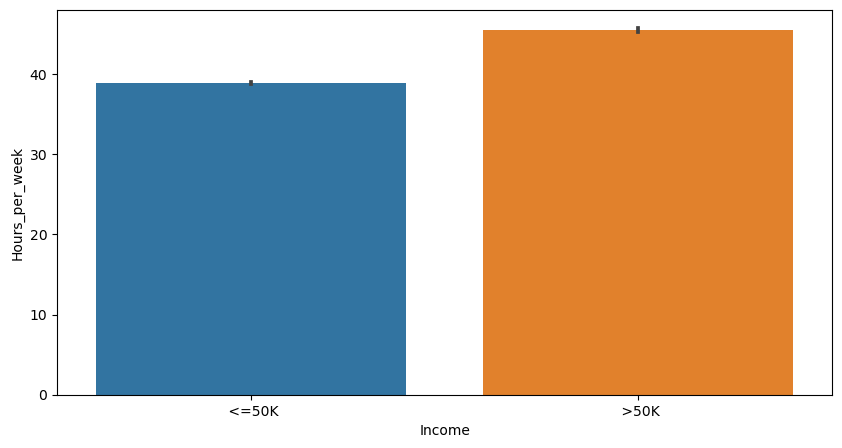

In [27]:
c=0
for i in ['Age', 'Education_num', 'Hours_per_week']:
    plt.figure(figsize=(10,5))
    sns.barplot(y=df[i],x=df['Income'])
    c+=1

Higher the 'Age', 'Education_num' and  'Hours_per_week', higher is the income.

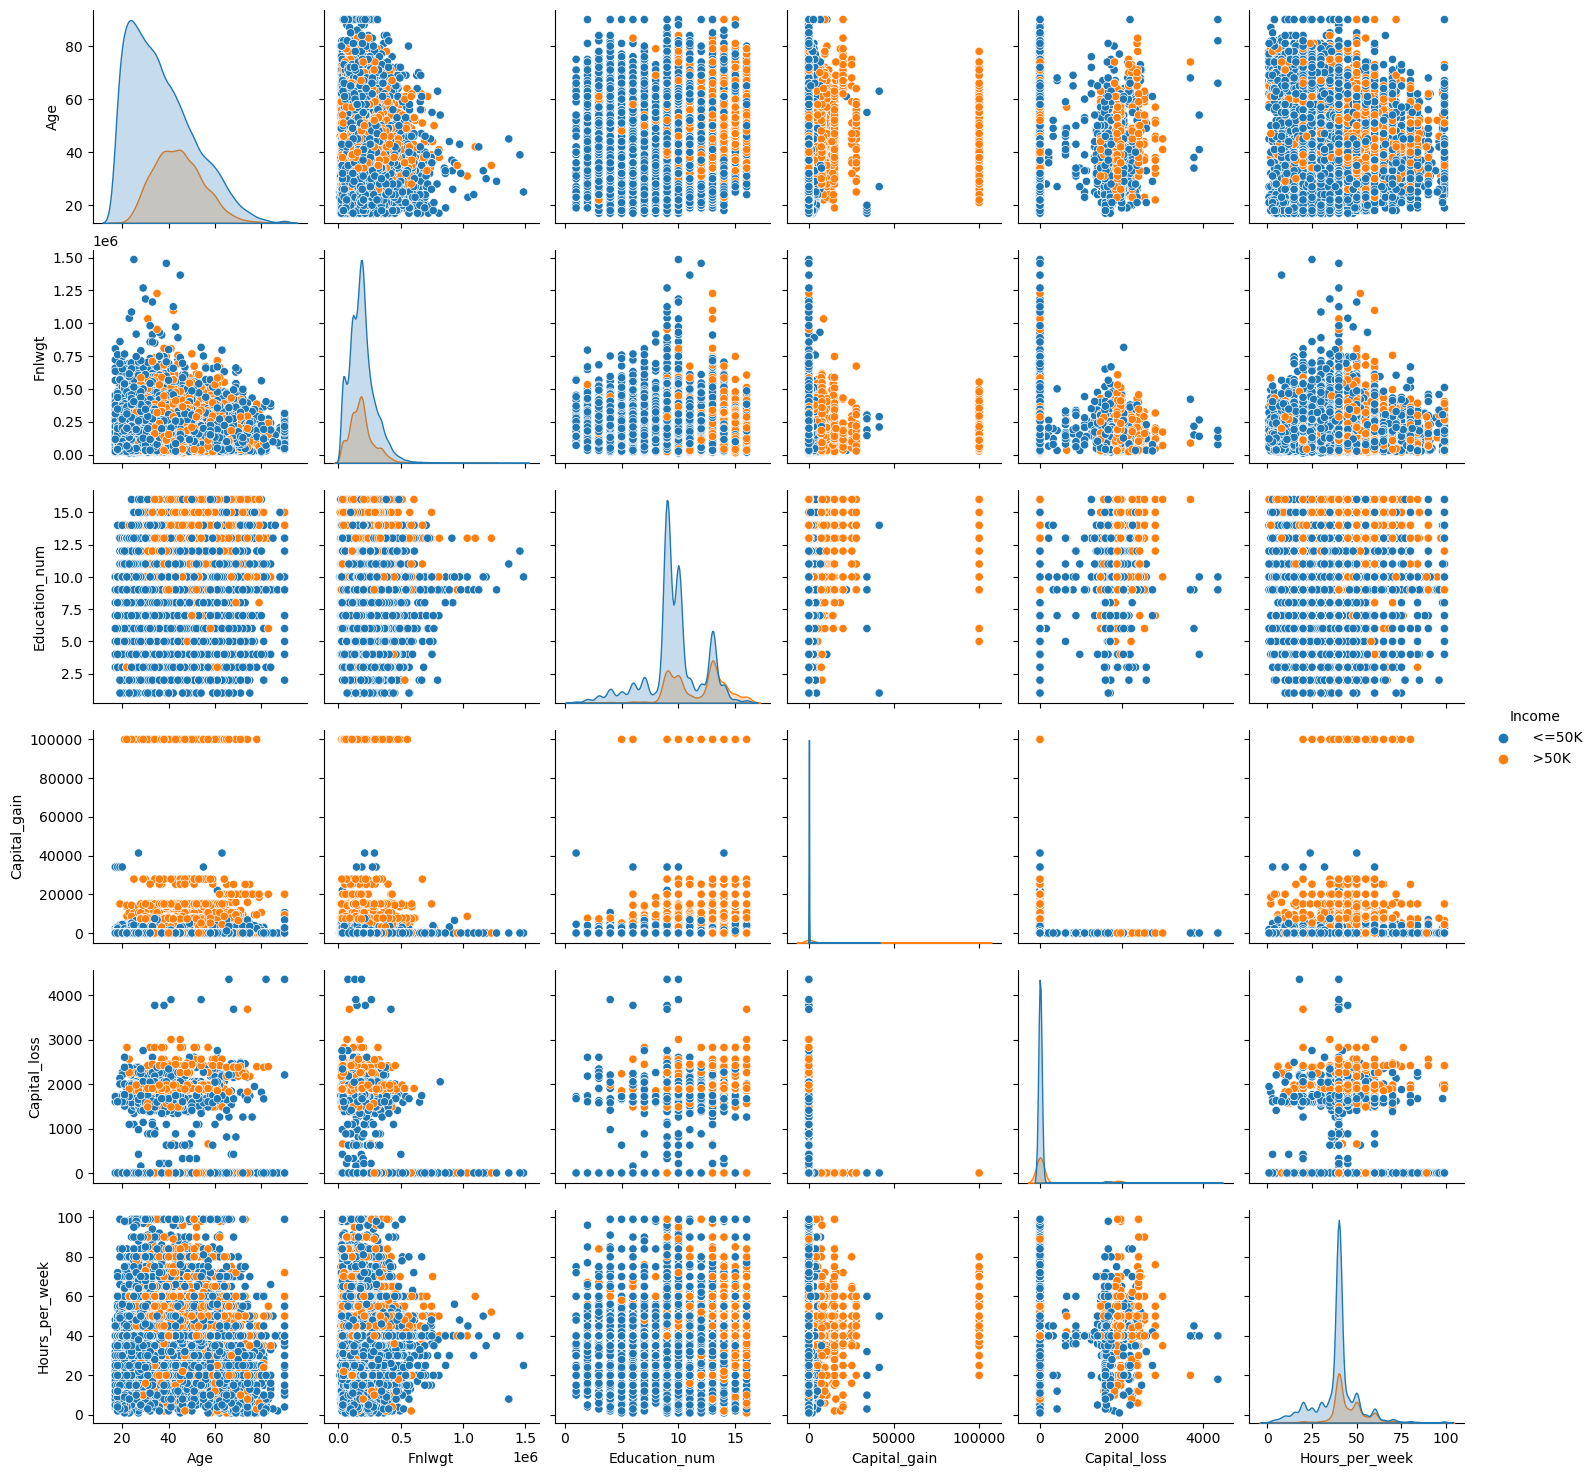

In [28]:
sns.pairplot(df, hue = "Income")

Capital_loss and Capital_gain got L shaped relation. which means if one got any value, other has to be 0.

There's no particular pattern in anyother column

#### Correlation

In [29]:
# correlation of features with target
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000


None of the columns are highly correlated.

Let's plot heatmap.

<AxesSubplot: >

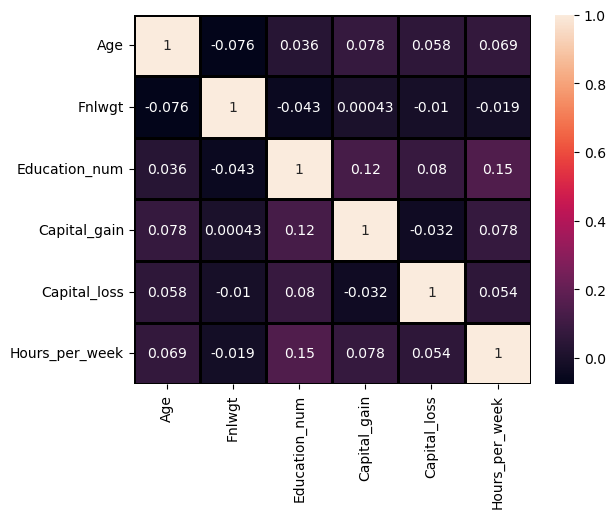

In [30]:
sns.heatmap(df.corr(), annot=True, linewidth=2, linecolor='Black')

#### Boxplot and outliers

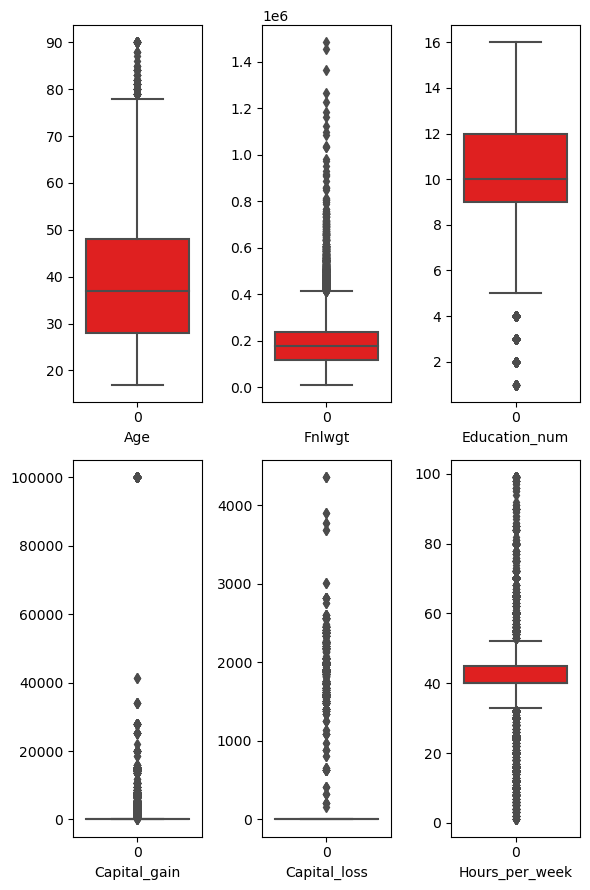

In [31]:
# Boxplot
plt.figure(figsize=(6,9))
c=1 
for i in con:
    plt.subplot(2,3,c)
    sns.boxplot(df[i], orient='v', color= 'red')
    plt.xlabel(i)
    c+=1
    
plt.tight_layout()

There are outliers in the dataset. 

Capital_gain and Capital_loss have too many outliers. Also the boxplot is indicating that these two columns have '0' as value in maximum of the rows.

In [32]:
# index of outliers by iqr
ind=[]
for i in con:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    upper= df[i].quantile(0.75) + (IQR * 1.5)
    lower= df[i].quantile(0.25) - (IQR * 1.5)
    
    ind.append(df[df[i]>upper].index)
    ind.append(df[df[i]<lower].index)
    
no=[j for i in range (len(ind)) for j in ind[i]]    #getting all elements from nested 'ind' list

# there are possibilities that several indexes are repeated in the list.
len(set(no))

13553

In [33]:
#zscore
from scipy.stats import zscore

z = zscore(df[con])
t=np.abs(z)
# taking thresold value = 3

df2 = df[(t<3).all(axis = 1)]
df2.shape

(29808, 15)

In [34]:
#Percentage of data loss
l=df.shape[0]-df2.shape[0]
print("By IQR, the percent of data loss is {0}".format(len(set(no))/df.shape[0]*100))
print()
print("By z-score, the percent of data loss is {0}".format(l/df.shape[0]*100))

By IQR, the percent of data loss is 41.65539709859847

By z-score, the percent of data loss is 8.384558642734202


##### The data loss by z-score is less compared to IQR method. 8.38% is still huge.

We already know that Capital_gain and Capital_loss have very large number of outliers. let's study these two columns.

More on Capital_gain and Capital_loss 

In [35]:
for i in ['Capital_gain', 'Capital_loss']:
    print(df[i].value_counts())

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64
0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


These two columns have '0' as value in maximum of the rows.

Also from the df.describe(), in Capital_gain and Capital_loss, the deviation is very large. The mean, min, max and quartiles confirms that these columns contains more noise.

Training the model with these two columns will affect the accuracy. We must delete these two.

In [36]:
df=df.drop(['Capital_gain', 'Capital_loss'], axis=1)
df.shape

(32536, 13)

In [37]:
con=df.select_dtypes(include= 'number').columns
con

Index(['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week'], dtype='object')

In [38]:
# index of outliers by iqr
ind=[]
for i in con:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    upper= df[i].quantile(0.75) + (IQR * 1.5)
    lower= df[i].quantile(0.25) - (IQR * 1.5)
    
    ind.append(df[df[i]>upper].index)
    ind.append(df[df[i]<lower].index)
    
no=[j for i in range (len(ind)) for j in ind[i]]    #getting all elements from nested 'ind' list

# there are possibilities that several indexes are repeated in the list.
len(set(no))

10600

In [39]:
#zscore
from scipy.stats import zscore

z = zscore(df[con])
t=np.abs(z)
# taking thresold value = 3

df2 = df[(t<3).all(axis = 1)]
df2.shape

(31442, 13)

In [40]:
#Percentage of data loss
l=df.shape[0]-df2.shape[0]
print("By IQR, the percent of data loss is {0}".format(len(set(no))/df.shape[0]*100))
print()
print("By z-score, the percent of data loss is {0}".format(l/df.shape[0]*100))

By IQR, the percent of data loss is 32.579296778952546

By z-score, the percent of data loss is 3.362429309073027


As we can see that after deleting those two columns, the data loss is now drastically reduced.

In [41]:
df2=df2.reset_index(drop=True)

#### Skewness

In [92]:
df2.skew()

Age              -0.012234
Fnlwgt            0.016543
Education_num     0.026287
Hours_per_week    0.225126
dtype: float64

we can see that data is skewed.

In [43]:
# PowerTransformation
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer()

In [44]:
x_pw = pw.fit_transform(df[con])
df3 = pd.DataFrame(x_pw, columns =con)

In [45]:
df3

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.891733,-1.089960,1.164586,-2.222186
1,0.102259,0.398771,-0.464659,-0.035725
2,1.064242,0.562562,-1.201027,-0.035725
3,-0.732199,1.340353,1.164586,-0.035725
4,0.027550,0.957178,1.600491,-0.035725
...,...,...,...,...
32531,-0.828514,0.746761,0.739547,-0.197711
32532,0.246949,-0.193274,-0.464659,-0.035725
32533,1.334550,-0.219732,-0.464659,-0.035725
32534,-1.358807,0.271699,-0.464659,-1.655414


In [46]:
df3.skew()

Age              -0.013967
Fnlwgt            0.016961
Education_num     0.023862
Hours_per_week    0.229590
dtype: float64

In [47]:
df2[con]=df3
df2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0.891733,Self-emp-not-inc,-1.089960,Bachelors,1.164586,Married-civ-spouse,Exec-managerial,Husband,White,Male,-2.222186,United-States,<=50K
1,0.102259,Private,0.398771,HS-grad,-0.464659,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.035725,United-States,<=50K
2,1.064242,Private,0.562562,11th,-1.201027,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.035725,United-States,<=50K
3,-0.732199,Private,1.340353,Bachelors,1.164586,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.035725,Cuba,<=50K
4,0.027550,Private,0.957178,Masters,1.600491,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.035725,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31437,-1.858559,Private,-0.929441,Assoc-acdm,-0.464659,Married-civ-spouse,Tech-support,Wife,White,Female,-1.250532,United-States,<=50K
31438,0.832324,Private,0.193427,HS-grad,-0.464659,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.369251,United-States,>50K
31439,0.385796,Private,-0.680818,HS-grad,-0.464659,Widowed,Adm-clerical,Unmarried,White,Female,0.774244,United-States,<=50K
31440,-0.732199,Private,-0.273769,HS-grad,-0.464659,Never-married,Adm-clerical,Own-child,White,Male,-0.035725,United-States,<=50K


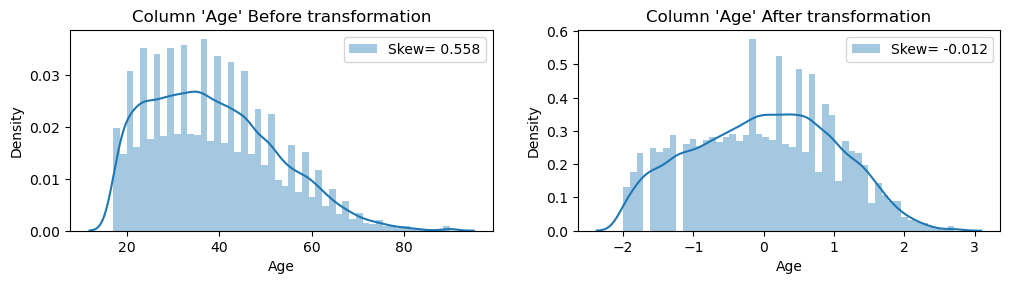

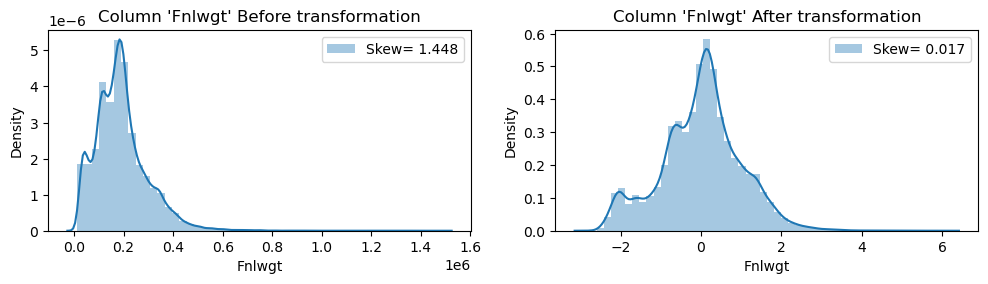

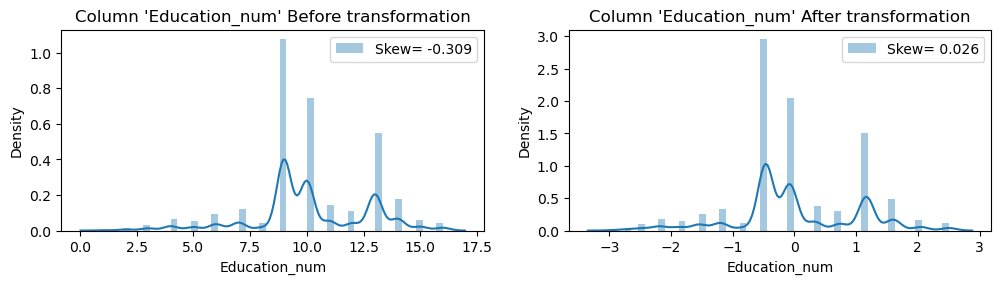

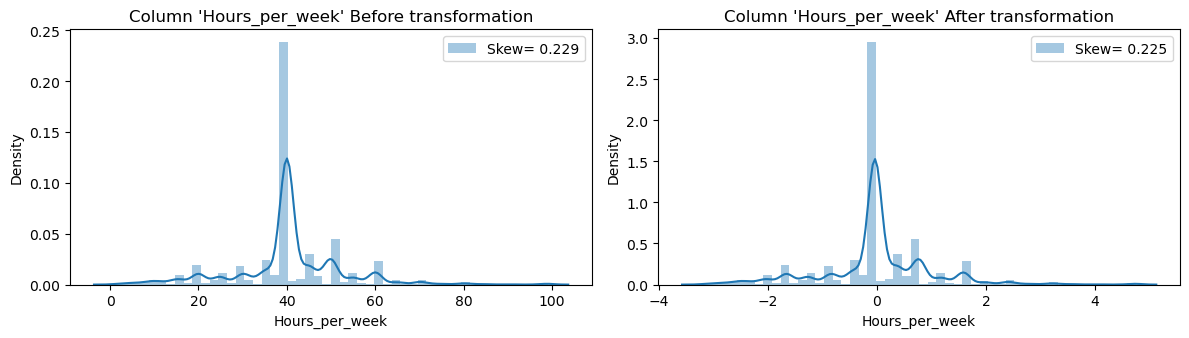

In [48]:
# Distribution plot and skewness
c=1
for i in df2[con]:
    plt.figure(figsize=(12,12))
    
    plt.subplot(4,2,c)
    skew= df[i].skew()
    sns.distplot(df[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' Before transformation")
    
    plt.subplot(4,2,c+1)
    skew= df2[i].skew()
    sns.distplot(df2[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' After transformation")
    
    c+=2
    
plt.tight_layout()

#### Splitting data into features and target variables

In [137]:
x= df2.drop("Income", axis=1)
y=df2["Income"]

print(x.shape, y.shape)

(31442, 12) (31442,)


#### Feature Selection

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
def vif_(x1):
    vif= pd.DataFrame()
    vif['Features']= x1.columns
    vif['VIF']= [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
    print(vif)

In [140]:
vif_(x[con])

         Features       VIF
0             Age  1.025047
1          Fnlwgt  1.005914
2   Education_num  1.028576
3  Hours_per_week  1.038390


VIF is in the range for every column

#### Encoding

In [141]:
cat

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [142]:
df[cat].nunique()

Workclass          9
Education         16
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native_country    42
Income             2
dtype: int64

We will use LabelEncoder for nunique>10 and dummies for others.

In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat[:-1]:
    if (df[i].nunique())>10:
        print("Encoding",i)
        x[i]= le.fit_transform(x[i])
    
print("Done")

Encoding Education
Encoding Occupation
Encoding Native_country
Done


In [144]:
y= le.fit_transform(y)

In [145]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [146]:
du=[]
for i in cat[:-1]:
    if df2[i].nunique()<=10:
        du.append(i)
du

['Workclass', 'Marital_status', 'Relationship', 'Race', 'Sex']

In [147]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.891733,Self-emp-not-inc,-1.089960,8,1.164586,Married-civ-spouse,4,Husband,White,Male,-2.222186,39
1,0.102259,Private,0.398771,10,-0.464659,Divorced,6,Not-in-family,White,Male,-0.035725,39
2,1.064242,Private,0.562562,1,-1.201027,Married-civ-spouse,6,Husband,Black,Male,-0.035725,39
3,-0.732199,Private,1.340353,8,1.164586,Married-civ-spouse,10,Wife,Black,Female,-0.035725,5
4,0.027550,Private,0.957178,11,1.600491,Married-civ-spouse,4,Wife,White,Female,-0.035725,39
...,...,...,...,...,...,...,...,...,...,...,...,...
31437,-1.858559,Private,-0.929441,6,-0.464659,Married-civ-spouse,13,Wife,White,Female,-1.250532,39
31438,0.832324,Private,0.193427,10,-0.464659,Married-civ-spouse,7,Husband,White,Male,0.369251,39
31439,0.385796,Private,-0.680818,10,-0.464659,Widowed,1,Unmarried,White,Female,0.774244,39
31440,-0.732199,Private,-0.273769,10,-0.464659,Never-married,1,Own-child,White,Male,-0.035725,39


In [148]:
x= pd.get_dummies(data = x, columns = du)
x.shape

(31442, 36)

In [149]:
x.head()

,Age,Fnlwgt,Education,Education_num,Occupation,Hours_per_week,Native_country,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,0.891733,-1.089960,8,1.164586,4,-2.222186,39,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.102259,0.398771,10,-0.464659,6,-0.035725,39,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1.064242,0.562562,1,-1.201027,6,-0.035725,39,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,-0.732199,1.340353,8,1.164586,10,-0.035725,5,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0.027550,0.957178,11,1.600491,4,-0.035725,39,0,0,0,...,0,0,1,0,0,0,0,1,1,0


#### Scaling

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [151]:
x = scaler.fit_transform(x)
x

array([[ 0.89367056, -1.09078236, -0.34812986, ...,  0.41059339,
        -0.7066177 ,  0.7066177 ],
       [ 0.10449999,  0.39811925,  0.24596491, ...,  0.41059339,
        -0.7066177 ,  0.7066177 ],
       [ 1.06611347,  0.56192952, -2.42746157, ..., -2.43549951,
        -0.7066177 ,  0.7066177 ],
       ...,
       [ 0.38792724, -0.68159352,  0.24596491, ...,  0.41059339,
         1.41519241, -1.41519241],
       [-0.72963753, -0.27449726,  0.24596491, ...,  0.41059339,
        -0.7066177 ,  0.7066177 ],
       [-0.37056103,  1.138888  ,  0.24596491, ...,  0.41059339,
         1.41519241, -1.41519241]])

In [153]:
y

array([0, 0, 0, ..., 0, 0, 1])

#### Oversampling using SMOTE

In [154]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x, y)
x.shape, y.shape

((47672, 36), (47672,))

#### MODEL

In [155]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [156]:
mdl, acc, rs, tr, cvsc= [],[],[],[],[]

# function to get best random_state
def prediction(model, ran):
    acc=0
    rs=0
    
    for i in range (ran):
        x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=i)
            
        model.fit(x_train, y_train)     #train model
        y_tr= model.predict(x_train)    #prediction on train
        y_pred=model.predict(x_test)    #prediction on test
        
        pred_tr= accuracy_score(y_train, y_tr)    #R2 score of train
        pred_test= accuracy_score(y_test,y_pred)       #R2 score of test
    
    #sort randomstate at which train and test score difference is 1.
        margin=np.abs(round(pred_tr*100)-round(pred_test*100))
            
        if ((margin<=1) and (round(pred_test*100)>=75)):   
            print("at random state", i)
            print("Accuracy of train is ",pred_tr*100)
            print("Accuracy of test is ",pred_test*100)
            print("-x"*20)
            print()            
    
    print("Best Random_states sorted.")

    
# function to get score at the best random_state
def final(model, best_rs):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=best_rs)
    
    model.fit(x_train, y_train)     #train model
    y_tr= model.predict(x_train)    #prediction on train
    y_pred=model.predict(x_test)    #prediction on test
    
    pred_tr= accuracy_score(y_train, y_tr)    # score of train
    pred_test= accuracy_score(y_test,y_pred)       #score of test
    
    print("at random state", best_rs)
    print("Accuracy of train is ",pred_tr*100)
    print("Accuracy of test is ",pred_test*100)
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification Report')
    print(classification_report(y_test, y_pred))
          
    #saving the data
    tr.append(pred_tr)
    acc.append(pred_test)
    rs.append(best_rs)
    


def cv_score(model, x, y):    # cross val score of the model
    cvsco=0
    for val in range(2,15):
        cv = cross_val_score(model, x, y, cv = val).mean()
        print('cross_val_score', cv*100,'at cv =', val)
        if cvsco<cv*100:
            cvsco=cv*100
    cvsc.append(cvsco)        

#### Linear Regression

In [157]:
lr= LogisticRegression()
prediction(lr, 100)

at random state 0
Accuracy of train is  76.44179672204508
Accuracy of test is  77.04312804161772
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 1
Accuracy of train is  76.69071991944956
Accuracy of test is  76.08659171001845
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 2
Accuracy of train is  76.41103093360184
Accuracy of test is  76.9340493371371
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 3
Accuracy of train is  76.57325054539352
Accuracy of test is  76.36348380600772
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 4
Accuracy of train is  76.4278122727527
Accuracy of test is  76.90887732841081
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 5
Accuracy of train is  76.58443810482744
Accuracy of test is  76.26279577110253
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 6
Accuracy of train is  76.53129719751635
Accuracy of test is  76.55646920624267
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 7
Accuracy of

at random state 59
Accuracy of train is  76.43340605246965
Accuracy of test is  76.81657996308105
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 60
Accuracy of train is  76.57325054539352
Accuracy of test is  76.16210773619734
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 61
Accuracy of train is  76.81378307322258
Accuracy of test is  75.70901157912402
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 62
Accuracy of train is  76.53129719751635
Accuracy of test is  76.5145158583655
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 63
Accuracy of train is  76.33551490742295
Accuracy of test is  77.05990938076859
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 64
Accuracy of train is  76.63478212228001
Accuracy of test is  76.19567041449908
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 65
Accuracy of train is  76.59003188454439
Accuracy of test is  76.39704648430946
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 66
Ac

Best accuracy is at random_state 99

In [158]:
#final metrics
final(lr,99)
mdl.append("LogisticRegression")

at random state 99
Accuracy of train is  76.6375790121385
Accuracy of test is  76.43060916261118

Confusion Matrix
[[4021 1922]
 [ 887 5088]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      5943
           1       0.73      0.85      0.78      5975

    accuracy                           0.76     11918
   macro avg       0.77      0.76      0.76     11918
weighted avg       0.77      0.76      0.76     11918



In [159]:
cv_score(lr,x,y)

cross_val_score 76.49563685182076 at cv = 2
cross_val_score 76.54598203671364 at cv = 3
cross_val_score 76.52919953012251 at cv = 4
cross_val_score 76.52710224077019 at cv = 5
cross_val_score 76.51032369691136 at cv = 6
cross_val_score 76.52709894349324 at cv = 7
cross_val_score 76.51871119315321 at cv = 8
cross_val_score 76.52708408865203 at cv = 9
cross_val_score 76.50822497863527 at cv = 10
cross_val_score 76.50190968798097 at cv = 11
cross_val_score 76.51032635360858 at cv = 12
cross_val_score 76.5229047323111 at cv = 13
cross_val_score 76.506108311435 at cv = 14


#### DecisionTreeClassifier

In [160]:
dt=DecisionTreeClassifier()
prediction(dt,200)

Best Random_states sorted.


DecisionTree is not feasible.
In such case we will go with any random state and check the metrics.

In [161]:
#final metrics
final(dt,97)
mdl.append("DecisionTreeClassifier")

at random state 97
Accuracy of train is  100.0
Accuracy of test is  82.74039268333613

Confusion Matrix
[[4916 1116]
 [ 941 4945]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      6032
           1       0.82      0.84      0.83      5886

    accuracy                           0.83     11918
   macro avg       0.83      0.83      0.83     11918
weighted avg       0.83      0.83      0.83     11918



In [162]:
cv_score(dt,x,y)

cross_val_score 80.67628796777983 at cv = 2
cross_val_score 81.46093528895197 at cv = 3
cross_val_score 82.41525423728812 at cv = 4
cross_val_score 82.80787563599554 at cv = 5
cross_val_score 83.02195393692404 at cv = 6
cross_val_score 82.90660750448203 at cv = 7
cross_val_score 83.21236784695418 at cv = 8
cross_val_score 83.21668392611473 at cv = 9
cross_val_score 83.2464498305605 at cv = 10
cross_val_score 83.19582916984237 at cv = 11
cross_val_score 83.59882652854739 at cv = 12
cross_val_score 83.42029704371157 at cv = 13
cross_val_score 83.39538587428422 at cv = 14


#### RandomForestClassifier

In [163]:
rf=RandomForestClassifier()
prediction(rf,20)

Best Random_states sorted.


RandomForest is also not feasible

In [164]:
#final metrics
final(rf,99)
mdl.append("RandomForestClassifier")

at random state 99
Accuracy of train is  99.99720311014151
Accuracy of test is  88.01812384628293

Confusion Matrix
[[5180  763]
 [ 665 5310]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5943
           1       0.87      0.89      0.88      5975

    accuracy                           0.88     11918
   macro avg       0.88      0.88      0.88     11918
weighted avg       0.88      0.88      0.88     11918



In [165]:
cv_score(rf,x,y)

cross_val_score 85.83445208927672 at cv = 2
cross_val_score 86.616970681469 at cv = 3
cross_val_score 87.49580466521229 at cv = 4
cross_val_score 87.80232719946135 at cv = 5
cross_val_score 88.05414943991302 at cv = 6
cross_val_score 88.11080232537618 at cv = 7
cross_val_score 88.20271857694244 at cv = 8


KeyboardInterrupt: 

#### KNeighborsClassifier

In [168]:
knn= KNeighborsClassifier()
prediction(knn,20)

Best Random_states sorted.


In [169]:
#final metrics on any random_state
final(knn,99)
mdl.append("KNeighborsClassifier")

at random state 99
Accuracy of train is  86.88818034345807
Accuracy of test is  80.64272528947811

Confusion Matrix
[[4178 1765]
 [ 542 5433]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      5943
           1       0.75      0.91      0.82      5975

    accuracy                           0.81     11918
   macro avg       0.82      0.81      0.80     11918
weighted avg       0.82      0.81      0.80     11918



In [170]:
cv_score(knn,x,y)

cross_val_score 80.05957375398557 at cv = 2
cross_val_score 81.3664362330343 at cv = 3
cross_val_score 81.5719919449572 at cv = 4
cross_val_score 81.86991606448328 at cv = 5
cross_val_score 82.11746046882115 at cv = 6
cross_val_score 82.14892819051549 at cv = 7
cross_val_score 82.16353415002517 at cv = 8
cross_val_score 82.14676489437768 at cv = 9
cross_val_score 82.23285208149429 at cv = 10
cross_val_score 82.293618785892 at cv = 11
cross_val_score 82.3020698966091 at cv = 12
cross_val_score 82.39432630145551 at cv = 13
cross_val_score 82.35031012412726 at cv = 14


#### GaussianNB

In [171]:
gnb= GaussianNB()
prediction(gnb,200)

Best Random_states sorted.


In [172]:
#final metrics on any random_state
final(gnb,102)
mdl.append("GaussianNB")

at random state 102
Accuracy of train is  67.88331375510433
Accuracy of test is  68.2580969961403

Confusion Matrix
[[2525 3492]
 [ 291 5610]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.42      0.57      6017
           1       0.62      0.95      0.75      5901

    accuracy                           0.68     11918
   macro avg       0.76      0.69      0.66     11918
weighted avg       0.76      0.68      0.66     11918



In [173]:
cv_score(gnb,x,y)

cross_val_score 66.888320187951 at cv = 2
cross_val_score 66.98692781959097 at cv = 3
cross_val_score 66.86734351401242 at cv = 4
cross_val_score 66.88623708552143 at cv = 5
cross_val_score 66.89881870445943 at cv = 6
cross_val_score 66.9512551682752 at cv = 7
cross_val_score 66.87153884880014 at cv = 8
cross_val_score 66.91768200194134 at cv = 9
cross_val_score 66.90929574901836 at cv = 10
cross_val_score 66.88832379840773 at cv = 11
cross_val_score 66.92821676815312 at cv = 12
cross_val_score 66.90093703189667 at cv = 13
cross_val_score 66.90510434516219 at cv = 14


#### AdaBoostClassifier

In [174]:
adb= AdaBoostClassifier()
prediction(adb,20)

at random state 0
Accuracy of train is  83.20467639984336
Accuracy of test is  83.77244504111428
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 1
Accuracy of train is  83.32214577389942
Accuracy of test is  83.57945964087934
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 2
Accuracy of train is  83.4983498349835
Accuracy of test is  83.44520892767243
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 3
Accuracy of train is  83.54030318286065
Accuracy of test is  83.18509817083404
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 4
Accuracy of train is  83.436818258097
Accuracy of test is  83.69692901493539
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 5
Accuracy of train is  83.60742853946411
Accuracy of test is  83.2018795099849
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 6
Accuracy of train is  83.29977065503161
Accuracy of test is  83.10958214465515
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 7
Accuracy of t

Best random_state is at 2.

In [177]:
#final metrics on any random_state
final(adb,2)
mdl.append("AdaBoost")

at random state 2
Accuracy of train is  83.4983498349835
Accuracy of test is  83.44520892767243

Confusion Matrix
[[4846 1086]
 [ 887 5099]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      5932
           1       0.82      0.85      0.84      5986

    accuracy                           0.83     11918
   macro avg       0.83      0.83      0.83     11918
weighted avg       0.83      0.83      0.83     11918



In [178]:
cv_score(adb,x,y)

cross_val_score 81.49437825138446 at cv = 2
cross_val_score 81.47347720231215 at cv = 3
cross_val_score 82.1320691391173 at cv = 4
cross_val_score 82.45110057356614 at cv = 5
cross_val_score 82.44908270325432 at cv = 6
cross_val_score 82.65885985038146 at cv = 7
cross_val_score 82.6669743245511 at cv = 8
cross_val_score 82.62717610207454 at cv = 9
cross_val_score 82.85394122835547 at cv = 10
cross_val_score 82.870556231098 at cv = 11
cross_val_score 82.79731021758398 at cv = 12
cross_val_score 82.8265377740061 at cv = 13
cross_val_score 82.90637851908322 at cv = 14


#### Model Summary

In [180]:
pd.DataFrame({"Model name": mdl, "Random_state":rs, "Train_Accuracy": tr, "Test_Accuracy": acc})

,Model name,Random_state,Train_Accuracy,Test_Accuracy
0,LogisticRegression,99,0.766376,0.764306
1,DecisionTreeClassifier,97,1.000000,0.827404
2,RandomForestClassifier,99,0.999972,0.880181
3,KNeighborsClassifier,99,0.868882,0.806427
4,GaussianNB,102,0.678833,0.682581
5,AdaBoost,3,0.835403,0.831851
6,AdaBoost,2,0.834983,0.834452


From the above data, we can see that AdaBoostClassifier have better metrics.

#### Hyperparameter Tunning

In [181]:
def tuned (model):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=2)
    
    model.fit(x_train, y_train)     #train model
    y_tr= model.predict(x_train)    #prediction on train
    y_pred=model.predict(x_test)    #prediction on test

    pred_tr= accuracy_score(y_train, y_tr)    #score of train
    pred_test= accuracy_score(y_test,y_pred)       #score of test

    print("Accuracy of train is ",pred_tr*100)
    print("Accuracy of test is ",pred_test*100)
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification Report')
    print(classification_report(y_test, y_pred))

In [182]:
adb.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [183]:
param = {'base_estimator' : [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(),
                            KNeighborsClassifier(), GaussianNB()], 
             'n_estimators' : [50,100], 
            'algorithm' : ['SAMME.R', 'SAMME'],}

In [184]:
grid = GridSearchCV(adb, param_grid=param)
grid.fit(x, y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'base_estimator': [LogisticRegression(),
                                            DecisionTreeClassifier(),
                                            RandomForestClassifier(),
                                            KNeighborsClassifier(),
                                            GaussianNB()],
                         'n_estimators': [50, 100]})

In [185]:
# getting best parameters
grid.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': RandomForestClassifier(),
 'n_estimators': 100}

In [186]:
#adaboost hyper tuned
adbht=AdaBoostClassifier(algorithm= 'SAMME.R', base_estimator = RandomForestClassifier(), n_estimators= 100)

In [187]:
tuned(adbht)

Accuracy of train is  100.0
Accuracy of test is  87.68249706326566

Confusion Matrix
[[5084  802]
 [ 666 5366]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      5886
           1       0.87      0.89      0.88      6032

    accuracy                           0.88     11918
   macro avg       0.88      0.88      0.88     11918
weighted avg       0.88      0.88      0.88     11918



We will stick to AdaboostClassifier without Hyper Tuning.

In [199]:
#AdaboostClassifier without tuning
model= adb
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=2)
    
model.fit(x_train, y_train)     #train model
y_tr= model.predict(x_train)    #prediction on train
y_pred=model.predict(x_test)    #prediction on test

pred_tr= accuracy_score(y_train, y_tr)    #score of train
pred_test= accuracy_score(y_test,y_pred)       #score of test

print("Accuracy of train is ",pred_tr*100)
print("Accuracy of test is ",pred_test*100)
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report')
print(classification_report(y_test, y_pred))

Accuracy of train is  83.4983498349835
Accuracy of test is  83.44520892767243

Confusion Matrix
[[4846 1086]
 [ 887 5099]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      5932
           1       0.82      0.85      0.84      5986

    accuracy                           0.83     11918
   macro avg       0.83      0.83      0.83     11918
weighted avg       0.83      0.83      0.83     11918



#### AUC-ROC Curve

In [200]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [201]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

print("Threshold", threshold)
print("FPR", fpr)
print("TPR", tpr)

Threshold [2 1 0]
FPR [0.         0.18307485 1.        ]
TPR [0.         0.85182092 1.        ]


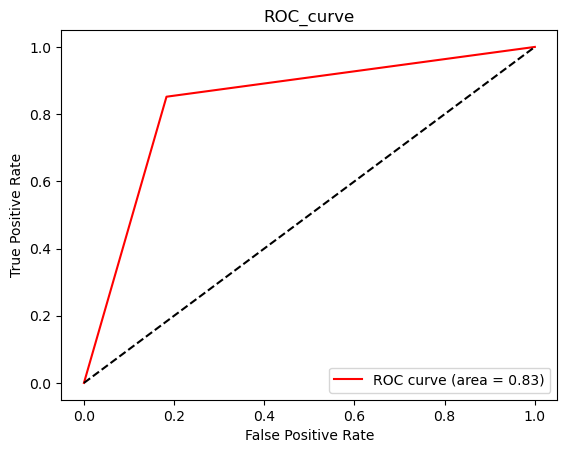

In [202]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,color='Red', label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="Black", linestyle="--")
plt.title("ROC_curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")

plt.show()

#### Saving model

In [203]:
import pickle

#saving model
pickle.dump(adb, open('income.pkl', 'wb'))

In [204]:
#Load model
file= pickle.load(open('income.pkl', 'rb'))

In [205]:
file.predict(x_test)

array([1, 1, 1, ..., 1, 1, 0])

#### Conclusion

In [206]:
pd.set_option('display.max_rows', None)

In [207]:
end= pd.DataFrame({"y_test actual": y_test, "Predicted output": y_pred, "Predicted output pickle": file.predict(x_test),
             "Correct Prediction?": y_test==y_pred})
end.shape

(11918, 4)

In [209]:
end.sample(50)

,y_test actual,Predicted output,Predicted output pickle,Correct Prediction?
5979,0,0,0,True
2558,1,1,0,True
4009,0,0,0,True
3204,1,1,1,True
8174,0,0,0,True
9778,1,1,1,True
10929,0,0,0,True
8077,0,0,1,True
2857,1,1,1,True
10869,1,1,1,True
